In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
X = pd.read_csv(r"C:/Users/KIIT/Documents/jupyter notebook/linearX.csv", header=None).values.flatten()
y = pd.read_csv(r"C:/Users/KIIT/Documents/jupyter notebook/linearY.csv", header=None).values.flatten()

In [26]:
# Normalize the predictor variable
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std

# Add a column of ones to X for the intercept term
X_with_bias = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

In [27]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Batch Gradient Descent
def gradient_descent(X, y, theta, lr, iterations, tolerance=1e-6):
    m = len(y)
    costs = []
    for i in range(iterations):
        predictions = X @ theta
        gradient = (1 / m) * (X.T @ (predictions - y))
        theta -= lr * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        # Convergence criteria: if the change in cost is below tolerance
        if i > 0 and abs(costs[-2] - costs[-1]) < tolerance:
            print(f"Converged at iteration {i} with cost {cost:.6f}")
            break
    return theta, costs

Converged at iteration 10 with cost 0.000001
Final theta values (after convergence): [0.99613347 0.00133954]
Final cost (after convergence): 1.3131948455078304e-06


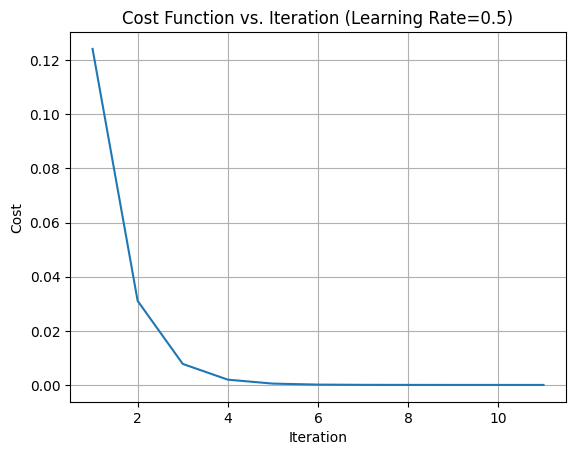

In [28]:
# Parameters for question 1
initial_theta = np.zeros(X_with_bias.shape[1])
learning_rate = 0.5
max_iterations = 1000

# Train the model
theta_final, costs = gradient_descent(X_with_bias, y, initial_theta, learning_rate, max_iterations)

# Question 1: Print the results
print("Final theta values (after convergence):", theta_final)
print("Final cost (after convergence):", costs[-1])

# Plot for cost function vs. iteration for the first 50 iterations
plt.plot(range(1, len(costs[:50]) + 1), costs[:50])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iteration (Learning Rate=0.5)")
plt.grid(True)
plt.show()

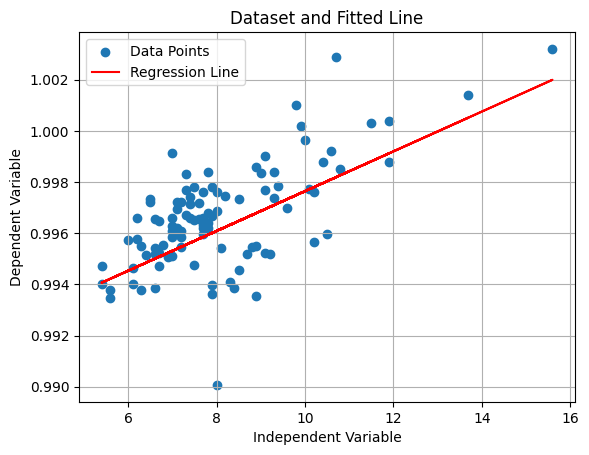

In [29]:
# Question 3: Plot dataset and regression line
plt.scatter(X, y, label="Data Points")
y_pred = X_with_bias @ theta_final
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Dataset and Fitted Line")
plt.legend()
plt.grid(True)
plt.show()

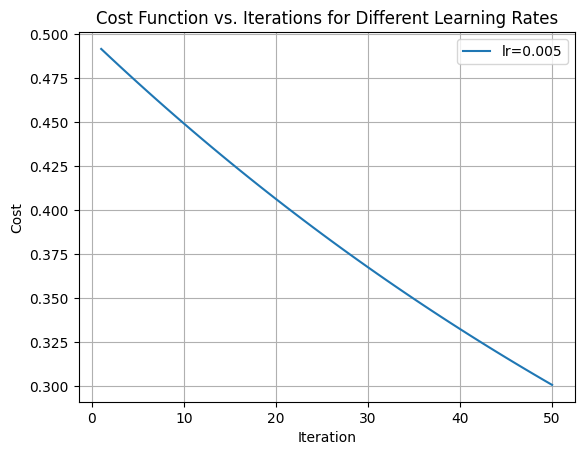

Converged at iteration 10 with cost 0.000001


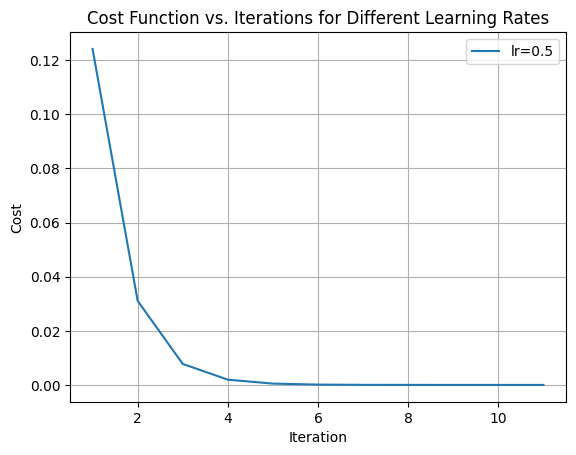

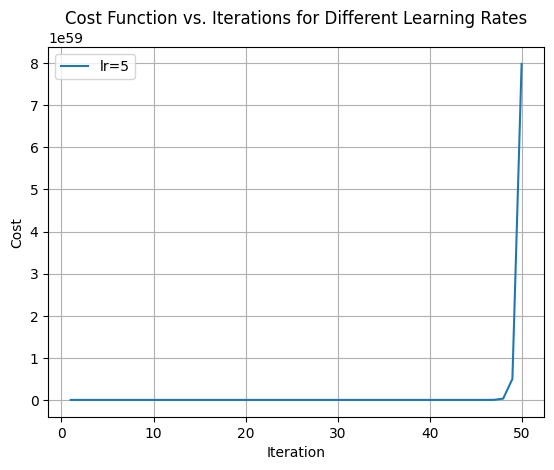

In [32]:
# Question 4: Test model with different learning rates
learning_rates = [0.005]
for lr in learning_rates:
    theta, costs_lr = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), lr, 50)
    plt.plot(range(1, len(costs_lr) + 1), costs_lr, label=f"lr={lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

learning_rates = [0.5]
for lr in learning_rates:
    theta, costs_lr = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), lr, 50)
    plt.plot(range(1, len(costs_lr) + 1), costs_lr, label=f"lr={lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()
learning_rates = [5]
for lr in learning_rates:
    theta, costs_lr = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), lr, 50)
    plt.plot(range(1, len(costs_lr) + 1), costs_lr, label=f"lr={lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

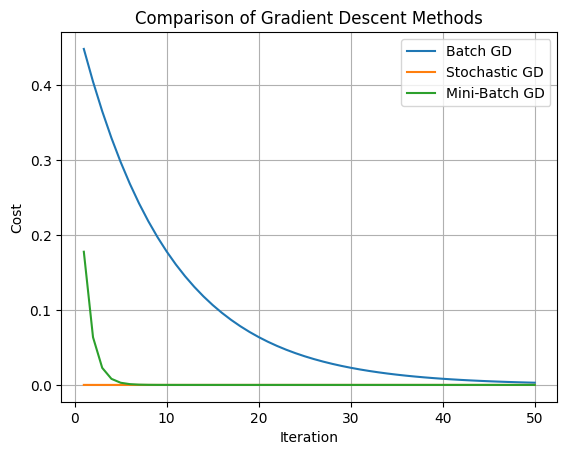

In [31]:
# Compare methods with a suitable learning rate
chosen_lr = 0.05
theta_batch, costs_batch = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), chosen_lr, 50)
theta_stoch, costs_stoch = stochastic_gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), chosen_lr, 50)
theta_mini, costs_mini = mini_batch_gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), chosen_lr, 50, batch_size=10)

# Plot comparison of gradient descent methods
plt.plot(range(1, len(costs_batch) + 1), costs_batch, label="Batch GD")
plt.plot(range(1, len(costs_stoch) + 1), costs_stoch, label="Stochastic GD")
plt.plot(range(1, len(costs_mini) + 1), costs_mini, label="Mini-Batch GD")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.grid(True)
plt.show()
